In [1]:
%matplotlib inline

In [8]:
import torch
from torch.nn import Linear,Module, MSELoss
from torch.optim import SGD
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys

In [4]:
sys.path.append(r'C:\Users\17374\Anaconda3\Lib\site-packages')

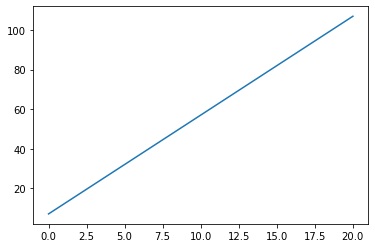

In [9]:
x = np.linspace(0,20,500)
y = 5*x + 7
plt.plot(x,y)

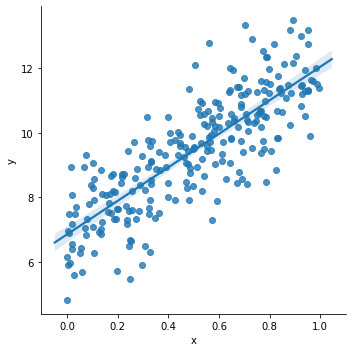

In [12]:
x = np.random.rand(256)
noise = np.random.randn(256)
y = x* 5 + 7 + noise
df = pd.DataFrame()
df['x'] = x
df['y'] = y
sns.lmplot(x = 'x', y = 'y',data = df)

In [14]:
model = Linear(1,1)
criterion = MSELoss()
optim = SGD(model.parameters(), lr = 0.01)
epochs = 3000
x_train = x.reshape(-1,1).astype('float32')
y_train = y.reshape(-1,1).astype('float32')

In [15]:
for i in range(epochs):
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    outputs = model(inputs)
    
    optim.zero_grad()
    loss = criterion(outputs,labels)
    loss.backward()
    optim.step()
    
    if (i%100==0):
        print('epoch{},loss{:1.4f}'.format(i,loss.data.item()))

epoch0,loss90.4742
epoch100,loss1.6411
epoch200,loss1.0973
epoch300,loss1.0867
epoch400,loss1.0810
epoch500,loss1.0766
epoch600,loss1.0731
epoch700,loss1.0703
epoch800,loss1.0682
epoch900,loss1.0666
epoch1000,loss1.0653
epoch1100,loss1.0642
epoch1200,loss1.0635
epoch1300,loss1.0628
epoch1400,loss1.0624
epoch1500,loss1.0620
epoch1600,loss1.0617
epoch1700,loss1.0615
epoch1800,loss1.0613
epoch1900,loss1.0611
epoch2000,loss1.0610
epoch2100,loss1.0609
epoch2200,loss1.0609
epoch2300,loss1.0608
epoch2400,loss1.0608
epoch2500,loss1.0607
epoch2600,loss1.0607
epoch2700,loss1.0607
epoch2800,loss1.0607
epoch2900,loss1.0607


In [16]:
[w,b] = model.parameters()
print(w.item(),b.item())

5.166729927062988 6.870129108428955


In [17]:
w,b

(Parameter containing:
 tensor([[5.1667]], requires_grad=True),
 Parameter containing:
 tensor([6.8701], requires_grad=True))

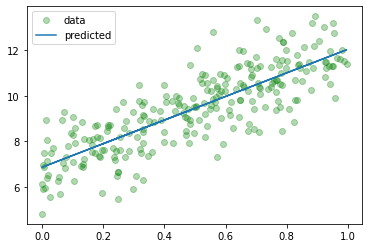

In [21]:
predicted = model.forward(torch.from_numpy(x_train)).data.numpy()
plt.plot(x_train,y_train,'go',label = 'data',alpha = 0.3)
plt.plot(x_train,predicted, label = 'predicted', alpha = 1)
plt.legend()
plt.show()

In [22]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum = 0.9)
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.01, alpha = 0.99)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, betas = (0.9,0.999),eps = 1e-08)

In [23]:
print(5 - w.data.item(), 7 - b.data.item())

-0.16672992706298828 0.12987089157104492
